In [3]:
# Importing Pandas
import pandas as pd

# Importing Numpy
import numpy as np

# Importing Seaborn
import seaborn as sns

# Importing Matplotlib
import matplotlib.pyplot as plt

import scipy.stats as stats

from scipy.stats import ttest_1samp


In [4]:
# Reading and previewing the dataset

df = pd.read_csv('train.csv')

# The first five rows od the dataset
df.head(5)

,Unnamed: 0,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,relationship_with_head_Child,relationship_with_head_Head of Household,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,0,1,0,1,3,24,0,2018,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,0,0,0,5,70,0,2018,0,1,...,1,0,0,0,0,0,1,0,0,0
2,2,1,1,1,5,26,1,2018,0,0,...,0,0,0,0,0,1,1,0,0,0
3,3,0,0,1,5,34,0,2018,0,1,...,0,0,0,0,0,0,1,0,0,0
4,4,0,1,0,8,26,1,2018,1,0,...,0,1,0,0,0,0,1,0,0,0


In [5]:
# The last five rows od the dataset
df.tail(5)


,Unnamed: 0,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,relationship_with_head_Child,relationship_with_head_Head of Household,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
23519,23519,0,0,1,4,48,0,2018,0,1,...,0,0,0,1,0,0,0,0,0,1
23520,23520,0,0,1,2,27,0,2018,0,1,...,0,0,0,1,0,0,0,0,0,1
23521,23521,0,0,1,5,27,0,2018,0,0,...,0,0,0,1,0,0,0,0,0,1
23522,23522,0,1,1,7,30,0,2018,0,0,...,0,0,0,0,0,1,0,0,0,1
23523,23523,0,0,1,10,20,1,2018,1,0,...,0,0,1,0,0,0,0,0,0,1


Checking the size

In [6]:
# Checking the dataset size, shape and info
def size_shape(data):
    return data.info(), data.shape, data.size


size_shape(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 39 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   Unnamed: 0                                       23524 non-null  int64
 1   bank_account                                     23524 non-null  int64
 2   location_type                                    23524 non-null  int64
 3   cellphone_access                                 23524 non-null  int64
 4   household_size                                   23524 non-null  int64
 5   age_of_respondent                                23524 non-null  int64
 6   gender_of_respondent                             23524 non-null  int64
 7   year_                                            23524 non-null  int64
 8   relationship_with_head_Child                     23524 non-null  int64
 9   relationship_with_head_Head of Household         2

(None, (23524, 39), 917436)

In [7]:
# drop irrelevant fields
df.drop(['year_', 'marital_status_Divorced/Seperated', 'marital_status_Dont know', 'marital_status_Married/Living together', 'marital_status_Single/Never Married', 'marital_status_Widowed' ], axis=1, inplace=True)
df

,Unnamed: 0,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,0,1,0,1,3,24,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,0,0,0,5,70,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,2,1,1,1,5,26,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,3,0,0,1,5,34,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,4,0,1,0,8,26,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,23519,0,0,1,4,48,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
23520,23520,0,0,1,2,27,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
23521,23521,0,0,1,5,27,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
23522,23522,0,1,1,7,30,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [8]:
# Frequency table for people with bank accounts
#
frequency_df = pd.DataFrame(df, columns=['bank_account', 'location_type', 'cellphone_access', 'age_of_respondent', 'gender_of_respondent', 'education_level_No formal education', 'education_level_Other/Dont know/RTA','education_level_Primary education', 'education_level_Secondary education', 'education_level_Tertiary education', 'education_level_Vocational/Specialised training', 'education_level_Tertiary education', 'job_type_Formally employed Government', 'job_type_Dont Know/Refuse to answer', 'job_type_Farming and Fishing', 'job_type_Formally employed Government', 'job_type_Formally employed Private', 'job_type_Government Dependent', 'job_type_Informally employed', 'job_type_No Income', 'job_type_Other Income', 'job_type_Remittance Dependent', 'job_type_Self employed'])
frequency_df.bank_account.value_counts()

0    20212
1     3312
Name: bank_account, dtype: int64

In [9]:
# Frequency table for people with cellpones
#
frequency_df.cellphone_access.value_counts()


1    17454
0     6070
Name: cellphone_access, dtype: int64

In [10]:
# Frequency table for gender of respondents
#
frequency_df.gender_of_respondent.value_counts()


0    13877
1     9647
Name: gender_of_respondent, dtype: int64

In [11]:
# Frequency table for age of respondents
#
frequency_df.age_of_respondent.value_counts().head(10)

30    1056
35     836
25     792
28     748
32     715
40     685
20     626
26     615
23     588
18     585
Name: age_of_respondent, dtype: int64

## KENYA

In [12]:
# Split data frame countrywise
df_country__Kenya=df[:6068]
df_country__Kenya.head(5)


,Unnamed: 0,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,0,1,0,1,3,24,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,0,0,0,5,70,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,2,1,1,1,5,26,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,3,0,0,1,5,34,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,4,0,1,0,8,26,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [13]:
# Frequency table for countries
#
df["country__Kenya"].value_counts()

0    17456
1     6068
Name: country__Kenya, dtype: int64

### People with & without a bank account per education level in KENYA

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

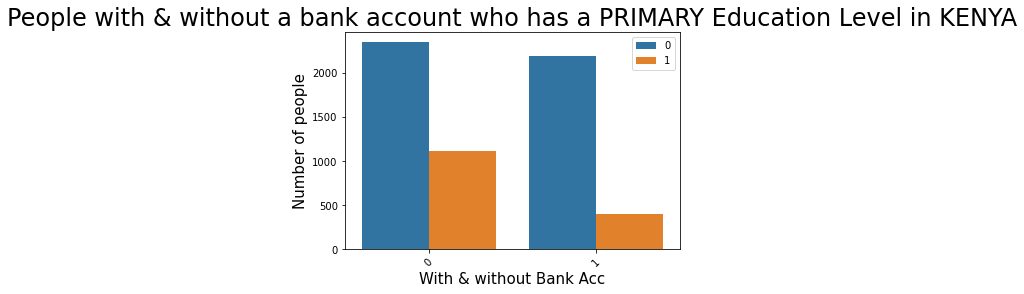

In [14]:
# PRIMARY EDUCATION

plt.title('People with & without a bank account who has a PRIMARY Education Level in KENYA', fontsize=24)
sns.countplot(df_country__Kenya["education_level_Primary education"], hue=df_country__Kenya["bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

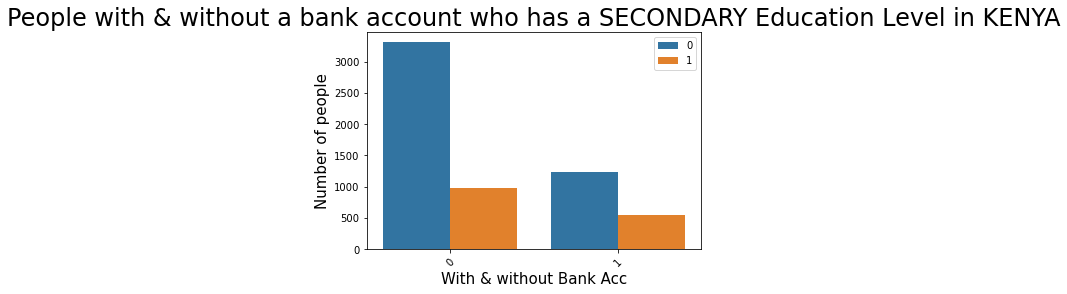

In [15]:
# SECONDARY EDUCATION

plt.title('People with & without a bank account who has a SECONDARY Education Level in KENYA', fontsize=24)
sns.countplot(df_country__Kenya["education_level_Secondary education"], hue=df_country__Kenya["bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

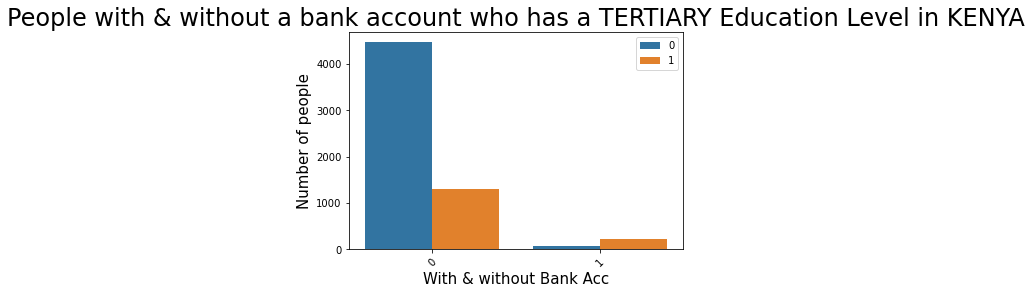

In [33]:
# TERTIARY EDUCATION

plt.title('People with & without a bank account who has a TERTIARY Education Level in KENYA', fontsize=24)
sns.countplot(df_country__Kenya["education_level_Tertiary education"], hue=df_country__Kenya["bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

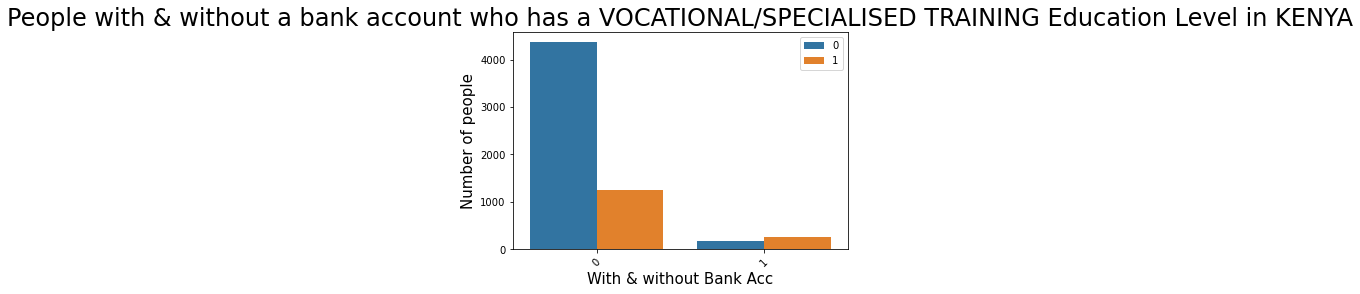

In [17]:
# VOCATIONAL/SPECIALISED TRAINING EDUCATION

plt.title('People with & without a bank account who has a VOCATIONAL/SPECIALISED TRAINING Education Level in KENYA', fontsize=24)
sns.countplot(df_country__Kenya["education_level_Vocational/Specialised training"], hue=df_country__Kenya["bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)

## TANZANIA

In [44]:
# Split data frame countrywise
df_country__Tanazania=df[14803:21422]
df_country__Tanazania.head(5)

,Unnamed: 0,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
14803,14803,0,0,1,6,22,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
14804,14804,0,1,0,2,100,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
14805,14805,0,1,1,3,19,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
14806,14806,0,1,0,4,21,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
14807,14807,1,1,1,5,24,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [45]:
# Frequency table for countries
#
df["country__Tanzania"].value_counts()

0    16904
1     6620
Name: country__Tanzania, dtype: int64

### People with & without a bank account per education level in TANZANIA

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

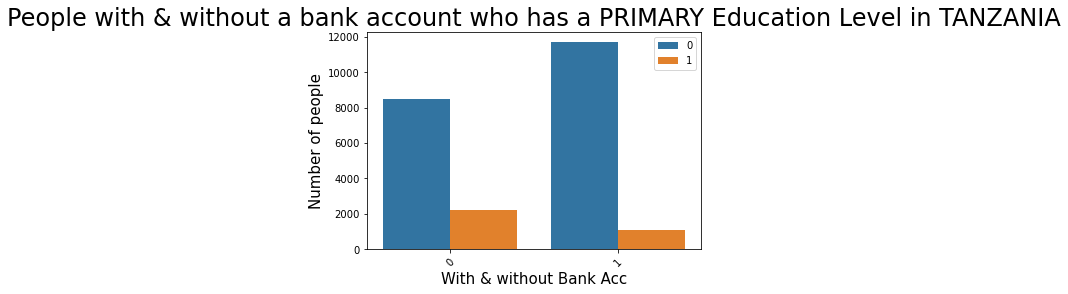

In [88]:
# PRIMARY EDUCATION

plt.title('People with & without a bank account who has a PRIMARY Education Level in TANZANIA', fontsize=24)
sns.countplot(df["education_level_Primary education"], hue=df["bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

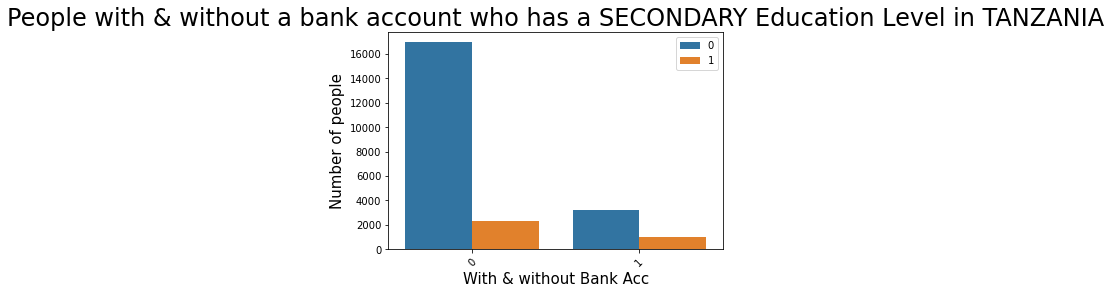

In [89]:
# SECONDARY EDUCATION

plt.title('People with & without a bank account who has a SECONDARY Education Level in TANZANIA', fontsize=24)
sns.countplot(df["education_level_Secondary education"], hue=df["bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

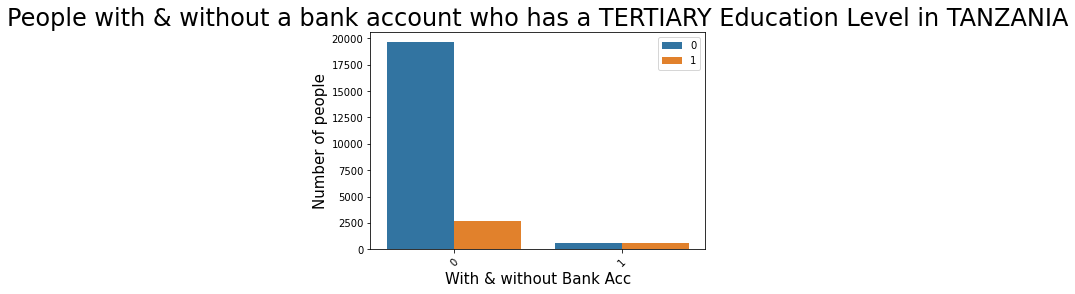

In [90]:
# TERTIARY EDUCATION

plt.title('People with & without a bank account who has a TERTIARY Education Level in TANZANIA', fontsize=24)
sns.countplot(df["education_level_Tertiary education"], hue=df["bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

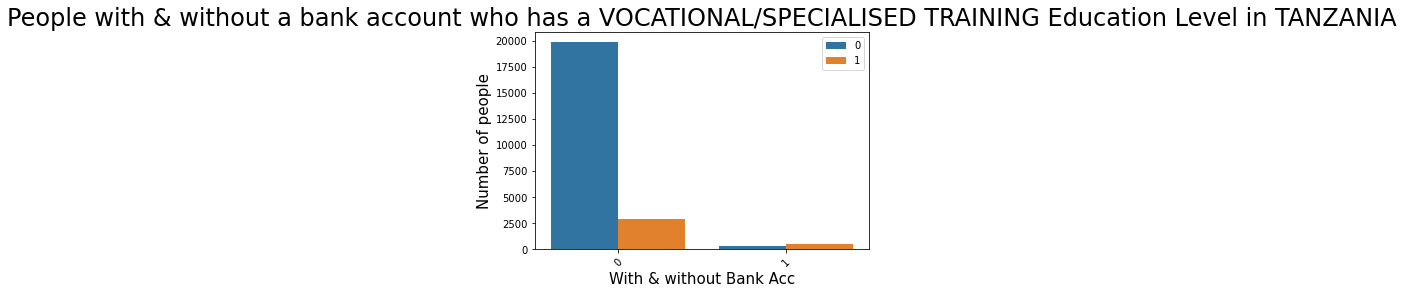

In [91]:
# VOCATIONAL/SPECIALISED TRAINING EDUCATION

plt.title('People with & without a bank account who has a VOCATIONAL/SPECIALISED TRAINING Education Level in TANZANIA', fontsize=24)
sns.countplot(df["education_level_Vocational/Specialised training"], hue=df["bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)

# RWANDA

In [ ]:
# Split data frame countrywise
df_country__Rwanda=df[6068:14803]
df_country__Rwanda.head(5)

,Unnamed: 0,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
6068,6068,0,1,1,7,18,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
6069,6069,1,1,1,4,26,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
6070,6070,0,0,0,6,42,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6071,6071,1,1,1,1,41,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
6072,6072,0,0,0,4,17,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [49]:
# Frequency table for countries
#
df["country__Rwanda"].value_counts()

0    14789
1     8735
Name: country__Rwanda, dtype: int64

### People with & without a bank account per education level in RWANDA

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

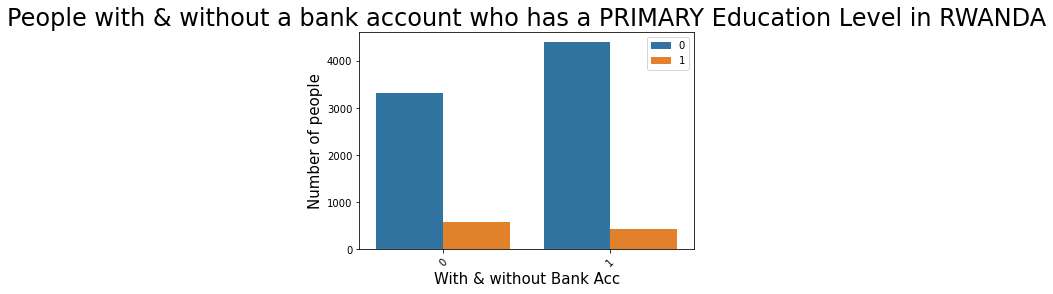

In [ ]:
# PRIMARY EDUCATION

plt.title('People with & without a bank account who has a PRIMARY Education Level in RWANDA', fontsize=24)
sns.countplot(df_country__Rwanda["education_level_Primary education"], hue=df_country__Rwanda["bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

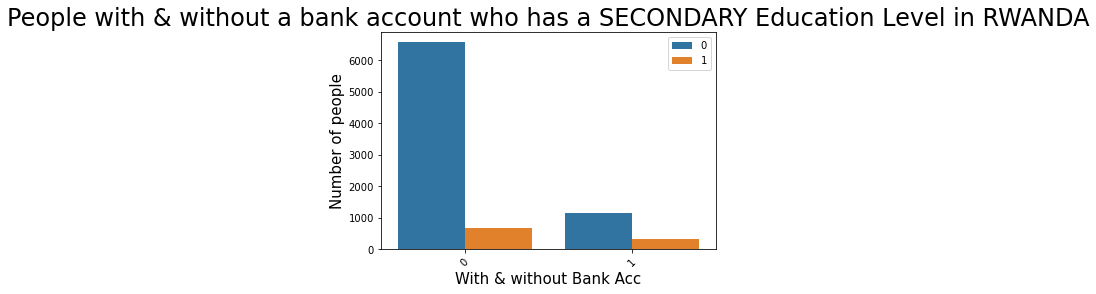

In [99]:
# SECONDARY EDUCATION

plt.title('People with & without a bank account who has a SECONDARY Education Level in RWANDA', fontsize=24)
sns.countplot(df_country__Rwanda["education_level_Secondary education"], hue=df_country__Rwanda["bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

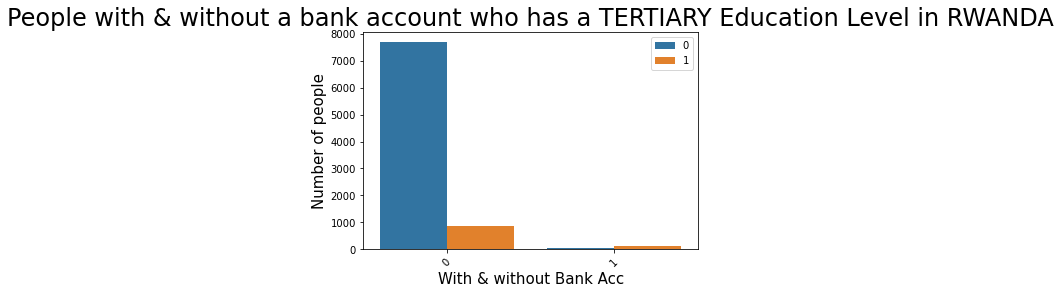

In [ ]:
# TERTIARY EDUCATION

plt.title('People with & without a bank account who has a TERTIARY Education Level in RWANDA', fontsize=24)
sns.countplot(df_country__Rwanda["education_level_Tertiary education"], hue=df_country__Rwanda["bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

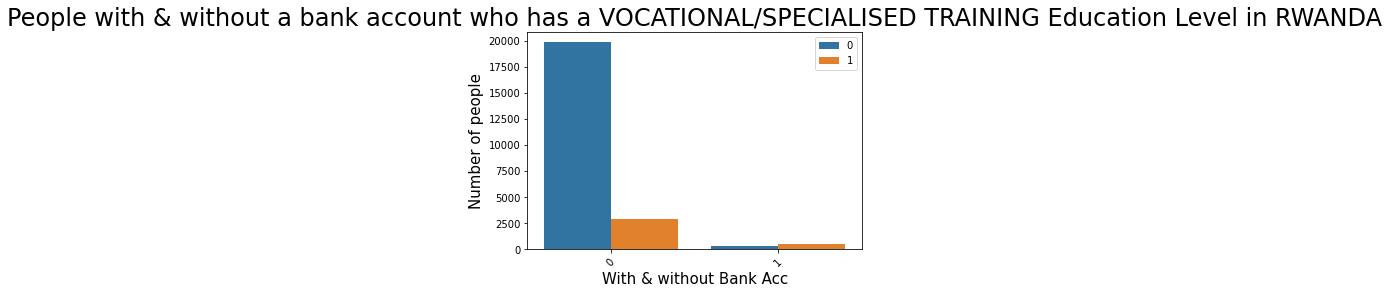

In [98]:
# VOCATIONAL/SPECIALISED TRAINING EDUCATION

plt.title('People with & without a bank account who has a VOCATIONAL/SPECIALISED TRAINING Education Level in RWANDA', fontsize=24)
sns.countplot(df["education_level_Vocational/Specialised training"], hue=df["bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)

# **UGANDA**

In [51]:
# Frequency table for countries
#
df["country__Uganda"].value_counts()

0    21423
1     2101
Name: country__Uganda, dtype: int64

### People with & without a bank account per education level in UGANDA

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

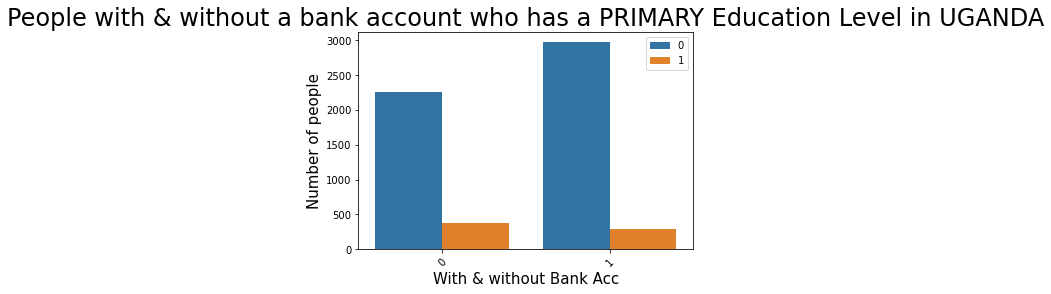

In [94]:
# PRIMARY EDUCATION

plt.title('People with & without a bank account who has a PRIMARY Education Level in UGANDA', fontsize=24)
sns.countplot(df_country__Uganda["education_level_Primary education"], hue=df_country__Uganda["bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

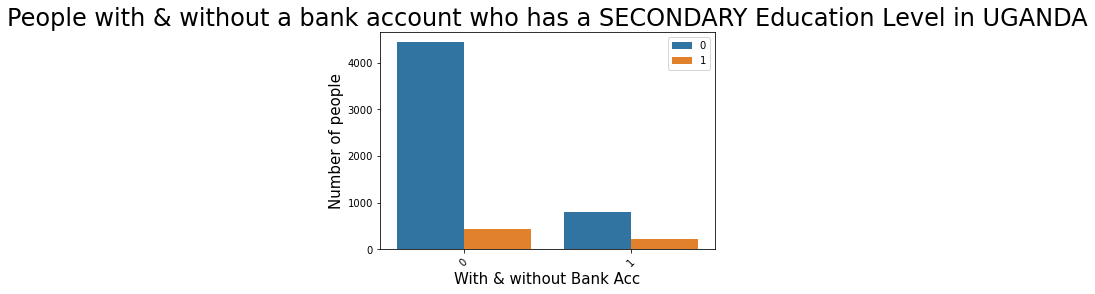

In [93]:
# SECONDARY EDUCATION

plt.title('People with & without a bank account who has a SECONDARY Education Level in UGANDA', fontsize=24)
sns.countplot(df_country__Uganda["education_level_Secondary education"], hue=df_country__Uganda["bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

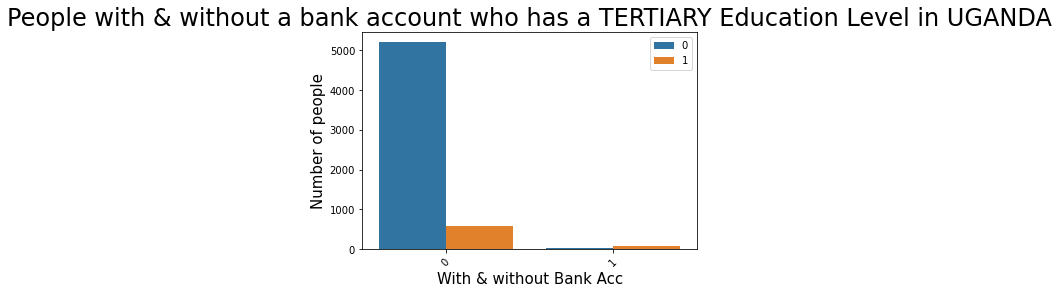

In [95]:
# TERTIARY EDUCATION

plt.title('People with & without a bank account who has a TERTIARY Education Level in UGANDA', fontsize=24)
sns.countplot(df_country__Uganda["education_level_Tertiary education"], hue=df_country__Uganda["bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

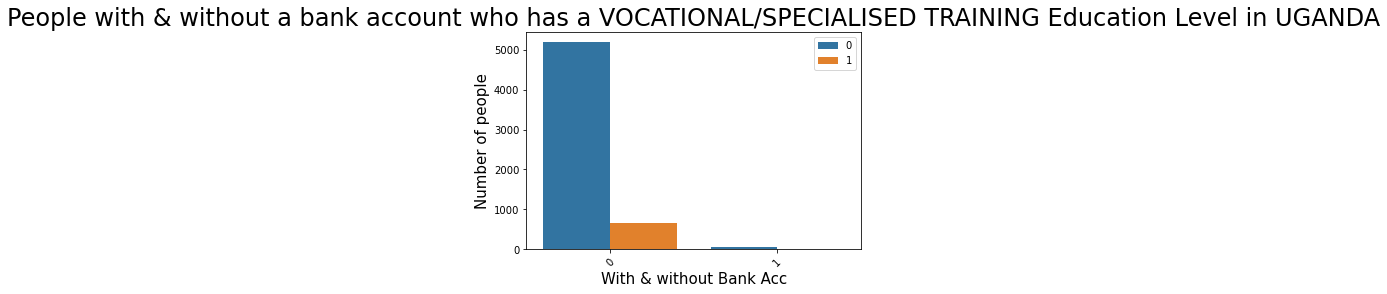

In [96]:
# VOCATIONAL/SPECIALISED TRAINING EDUCATION

plt.title('People with & without a bank account who has a VOCATIONAL/SPECIALISED TRAINING Education Level in UGANDA', fontsize=24)
sns.countplot(df_country__Uganda["education_level_Vocational/Specialised training"], hue=df_country__Uganda["bank_account"])
plt.xlabel('With & without Bank Acc', fontsize=(15))
plt.ylabel("Number of people", fontsize = (15))
plt.legend()
plt.xticks(rotation = 45)

## **RELATIONSHIPS**

### Relationship between the respondents age and the household_size

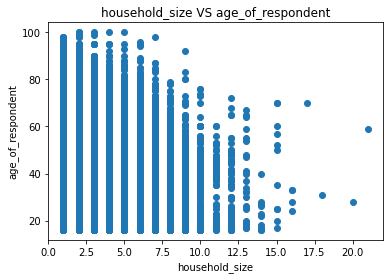

In [72]:
# Plotting our scatterplot to compare the variables
plt.scatter(df["household_size"] , df["age_of_respondent"])

# Title
plt.title('household_size VS age_of_respondent')

# Label of the x axis
plt.xlabel('household_size')

# Label of the y axis
plt.ylabel('age_of_respondent')

# Display the scatterplot
plt.show()


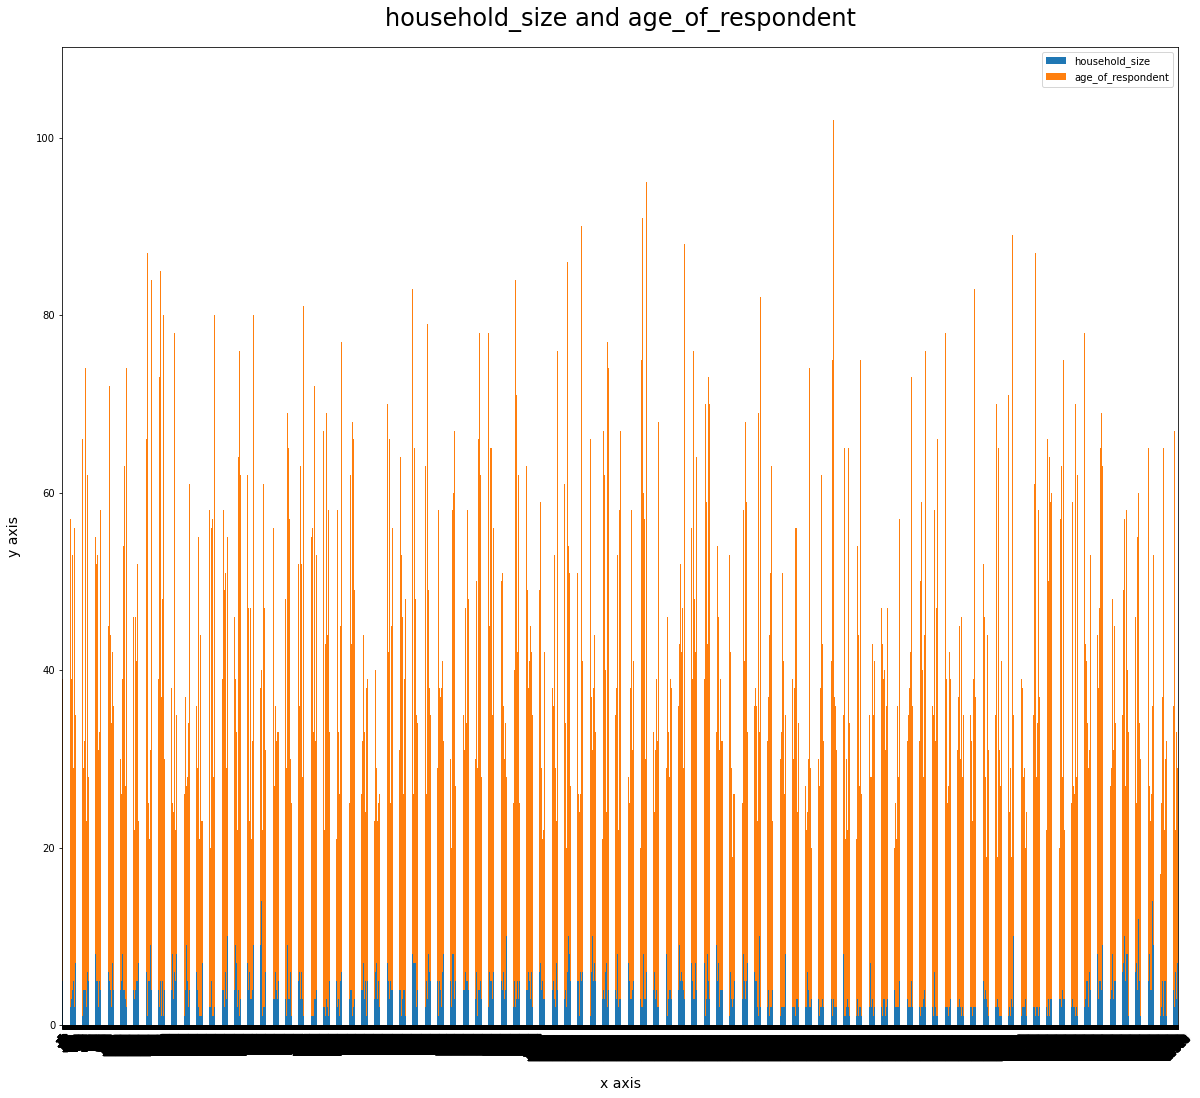

In [74]:
# Compare the percentage
df[['household_size', 'age_of_respondent']].plot(kind='bar', figsize=(20, 18), stacked=True)

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title("household_size and age_of_respondent", fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel("y axis", fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel("x axis", fontsize=14, labelpad=15)

# Displaying our chart
plt.show()


### Age of the respondents & possession of bank account

bank_account         0   1
age_of_respondent         
16                 457   5
17                 467  10
18                 564  21
19                 442  28
20                 590  36
...                ...  ..
96                   3   0
97                   1   0
98                   6   0
99                   2   0
100                  5   0

[85 rows x 2 columns]


Text(0, 0.5, 'Distribution across the population')

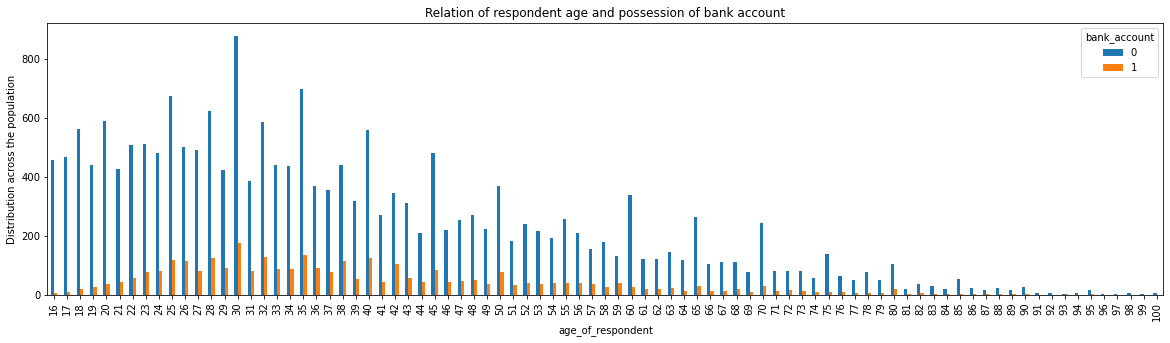

In [75]:
# create crosstab dataframe
age_bank = pd.crosstab(index=df['age_of_respondent'], columns=df['bank_account'])
print(age_bank)
# plot chart
age_bank.plot(kind="bar", figsize=(20,5))
# format and label chart
plt.title("Relation of respondent age and possession of bank account")
plt.ylabel("Distribution across the population")


### Gender of respondents & Possession of bank account

bank_account              0     1
gender_of_respondent             
0                     12395  1482
1                      7817  1830


Text(0, 0.5, 'Distribution across the population')

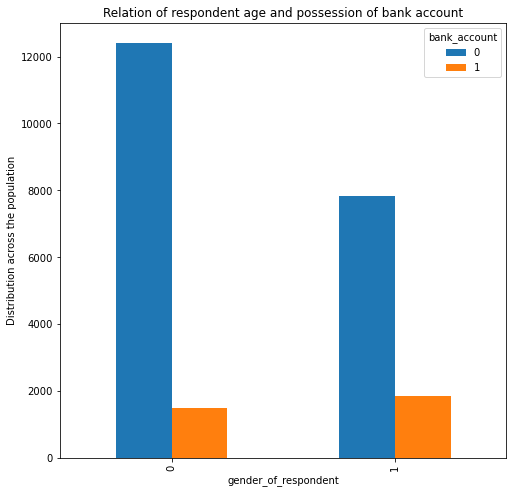

In [77]:
# create crosstab dataframe
gender_bank = pd.crosstab(index=df['gender_of_respondent'], columns=df['bank_account'])
print(gender_bank)
# plot of the relation of gender to individuals possession to bank account
gender_bank.plot(kind="bar", figsize=(8,8))
# formatting&labelling chart
plt.title("Relation of respondent and possession of bank account")
plt.ylabel("Distribution across the population")


### Type of residence & Possession of a bank account

bank_account       0     1
location_type             
0              12672  1671
1               7540  1641


Text(0, 0.5, 'Distribution across the population')

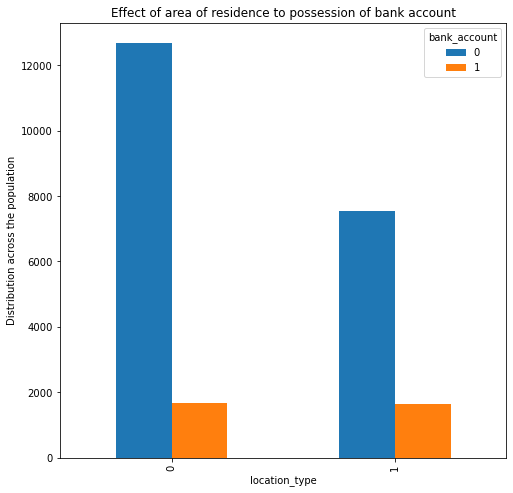

In [78]:
# create crosstab dataframe
location_bank = pd.crosstab(index=df['location_type'], columns=df['bank_account'])
print(location_bank)
# plot chart
location_bank.plot(kind="bar", figsize=(8,8))
# label chart
plt.title("Effect of area of residence to possession of bank account")
plt.ylabel("Distribution across the population")


### Household size & Possession of a bank account


bank_account       0    1
household_size           
1               2473  584
2               4610  619
3               3361  559
4               2973  501
5               2426  427
6               1819  277
7               1223  177
8                665   86
9                326   37
10               165   25
11                63    6
12                61    7
13                23    2
14                 8    2
15                 9    2
16                 4    0
17                 0    1
18                 1    0
20                 1    0
21                 1    0


Text(0, 0.5, 'Distribution across the population')

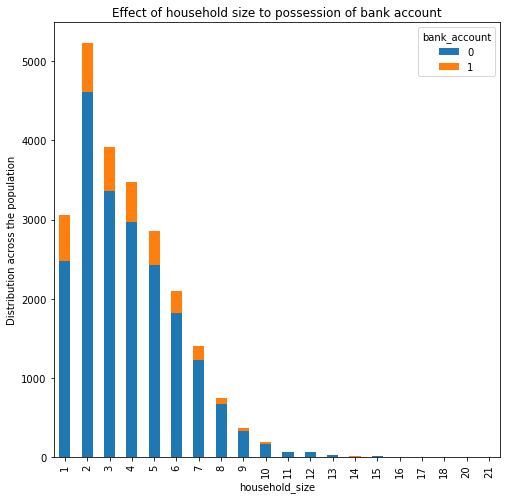

In [79]:
# create crosstab dataframe
housesize_bank = pd.crosstab(index=df['household_size'], columns=df['bank_account'])
print(housesize_bank)
# plot chart
housesize_bank.plot(kind="bar", figsize=(8,8), stacked=True)
# label chart
plt.title("Effect of household size to possession of bank account")
plt.ylabel("Distribution across the population")

### Cellphone access & Possession of a bank account


bank_account          0     1
cellphone_access             
0                  5966   104
1                 14246  3208


Text(0, 0.5, 'Distribution across the population')

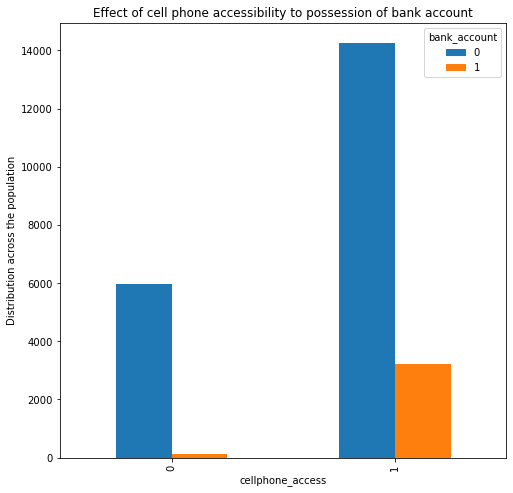

In [81]:
# create crosstab dataframe
cellphone_bank = pd.crosstab(index=df['cellphone_access'], columns=df['bank_account'])
print(cellphone_bank)
# plot chart
cellphone_bank.plot(kind="bar", figsize=(8,8))
# labelling chart
plt.title("Effect of cell phone accessibility to possession of bank account")
plt.ylabel("Distribution across the population")


bank_account                                  0     1
relationship_with_head_Head of Household             
0                                          9654  1039
1                                         10558  2273


Text(0, 0.5, 'Distribution across the population')

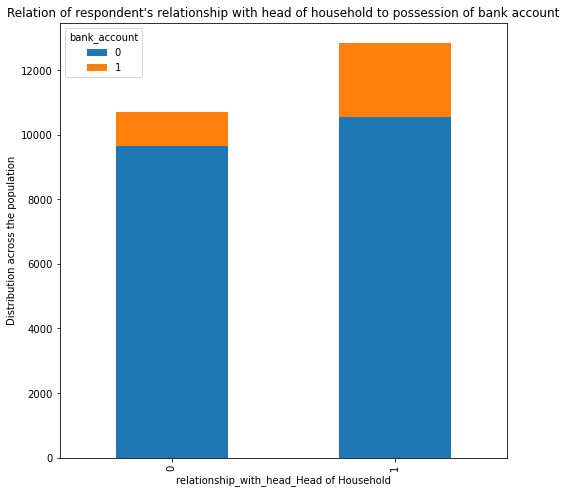

In [82]:
# create crosstab dataframe
relation_with_head_bank = pd.crosstab(index=df['relationship_with_head_Head of Household'], columns=df['bank_account'])
print(relation_with_head_bank)
# plot chart
relation_with_head_bank.plot(kind="bar", figsize=(8,8), stacked=True)
# label chart
plt.title("Relation of respondent's relationship with head of household to possession of bank account")
plt.ylabel("Distribution across the population")


## WHAT WE FIND ?

**We find out that, in general, very few people get access to the bank.**

### Education
> People who get **primary education** are less likely than those who get **secondary education**. The more likely are thoses with a a **tertiary education** or a **Vocational/Specialised training education**.

### Household
> People that are around **60** have the biggest house. The senior have small household while the younger ones have somewhat larger households.

### Gender
> Even if their is few person with a bank account, we see that the difference between the males and females is very small.

### Location type
> Most of those who don't have an account live in the **countryside**. Among those who have accounts, there are more citizens.

## **CONCLUSION**
**People that are less than 60, get a tertiary education level or a vocational training and who live in the city are more likely to have a bank account**. Those between 30 to 50 usually have an account. Males and females are almost in the same proportions.

##### etc..
> most individuals who had gone through higher education i.e. tertiary level or vocational training, have/use a bank account, hence the bars are almost equal
> a huge population of individuals of ages 30, 35, 40, 42 had bank accounts
> as much as females dominated the respondents population, males who have/use a bank account were relatively more than the females who use a bank account
> most respondents who are married have a bank account followed by those who are single
> more individuals that are self employed have a bank account, followed by farmers, formally employed privately and informally employed
area of residence did not have a huge effect on bank account possession as more individuals living in the rural areas had a bank account compared to those in urban areas
> individuals who live in households with a smaller size tend to own a bank account
> more individuals that have access to a cell phone have a bank account. This could be due to the accessiblity of mobile banking, online banking services which can be done on the phone.
> more individuals that are head of household have a a bank account followed by spouses. This could be due to the responsibilities that generally fall onto the head of the household that leads them to budgeting, saving for the future and hence having a bank account to manage finances.